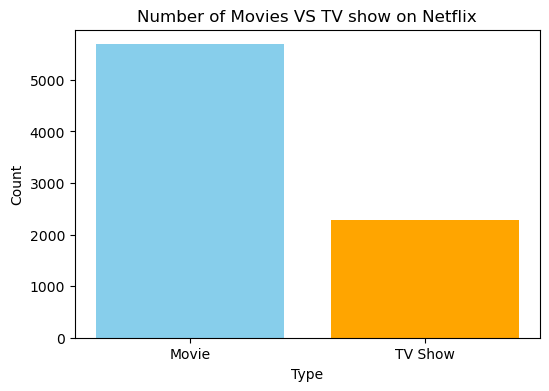

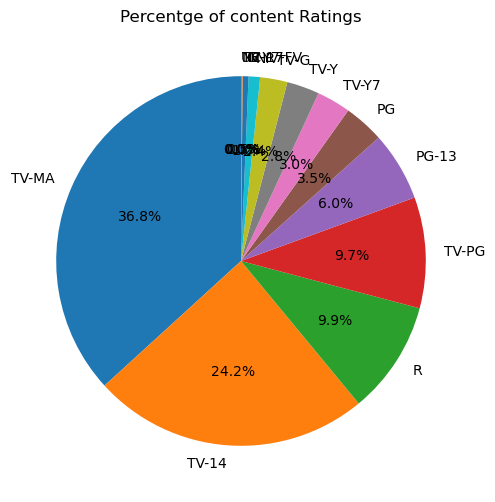

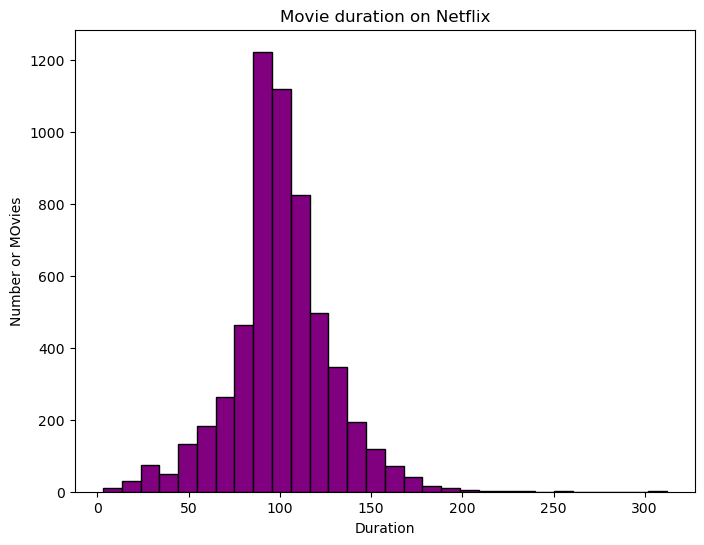

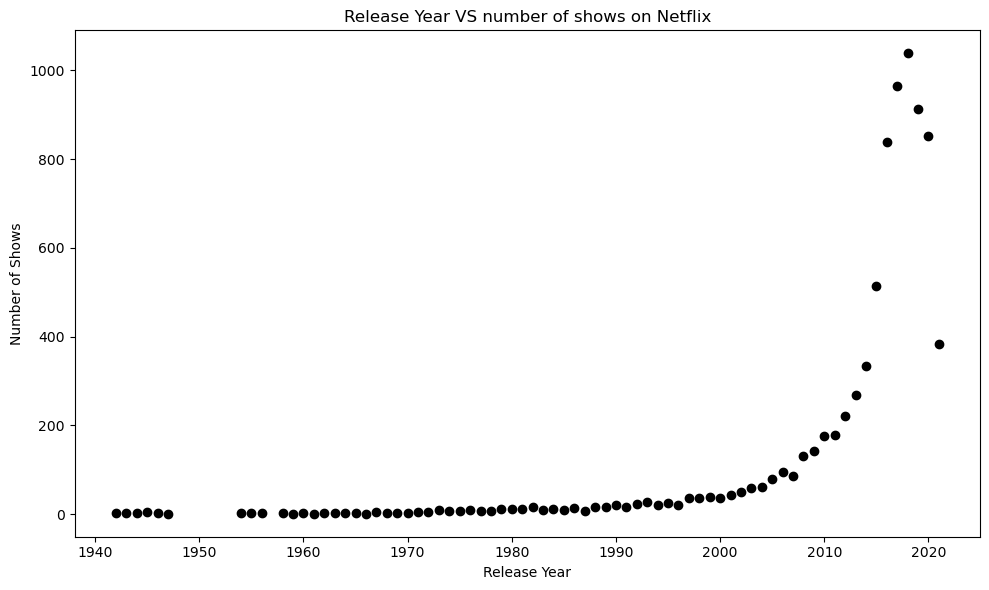

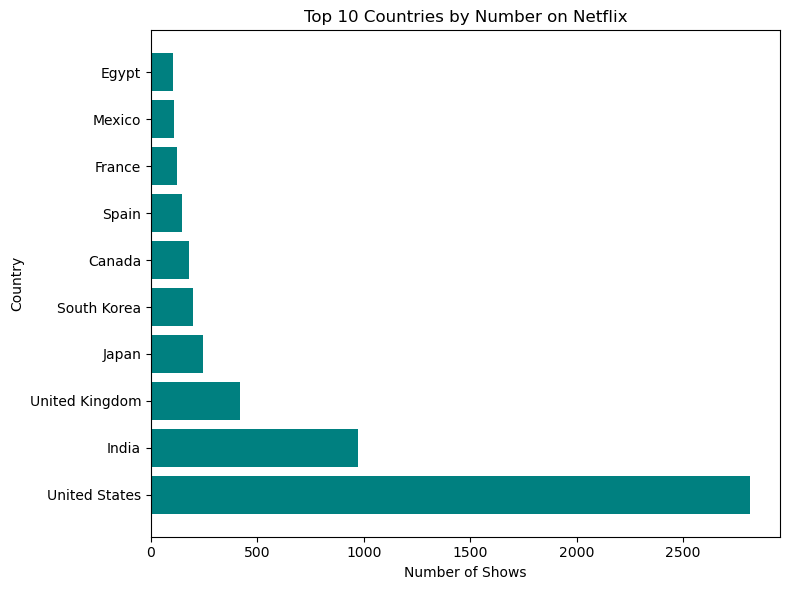

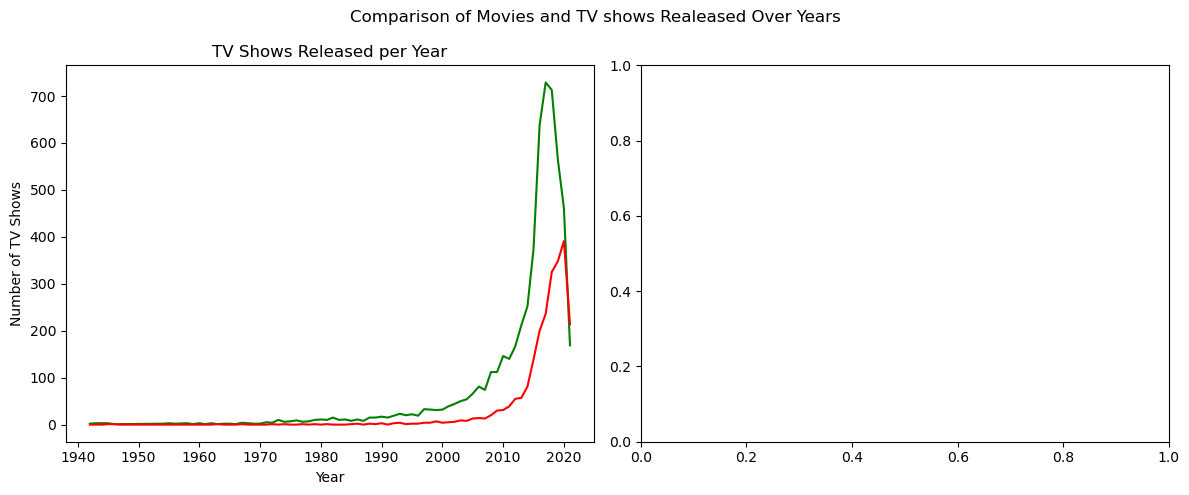

In [29]:
#import the libraries

import pandas as pd
import matplotlib.pyplot as plt

#load data
df=pd.read_csv(r"D:\Data Science\dataNetflix\netflix_titles.csv")
df.head()

#clear data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts =df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])

plt.title('Number of Movies VS TV show on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('movies_vs_tvshows.png')
plt.show()


rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentge of content Ratings')
plt.savefig('content_rating.png')
plt.show()


movie_df=df[df['type']=="Movie"].copy()
movie_df['duration_int']= movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='purple',edgecolor='black')
plt.title('Movie duration on Netflix')
plt.xlabel('Duration')
plt.ylabel('Number or MOvies')
plt.savefig('movies_duration_histogram.png')
plt.show()


release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values,color="black")
plt.title('Release Year VS number of shows on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()



country_counts= df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 Countries by Number on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()



content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,5))

#first subplot
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='green')
ax[0].set_title('Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#Second subplot
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='red')
ax[0].set_title('TV Shows Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV shows Realeased Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()



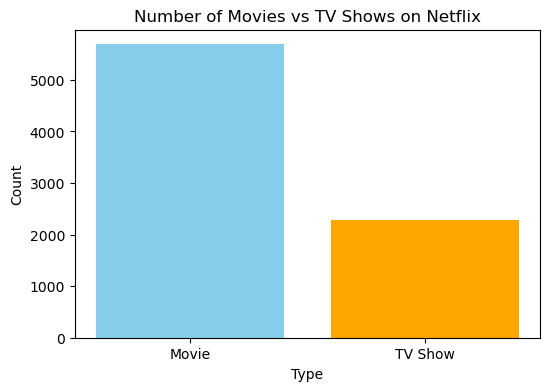

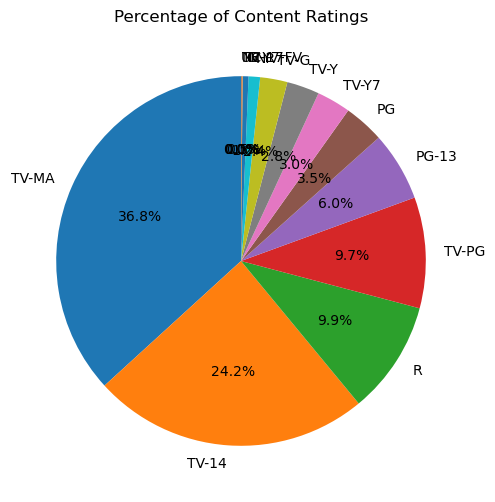

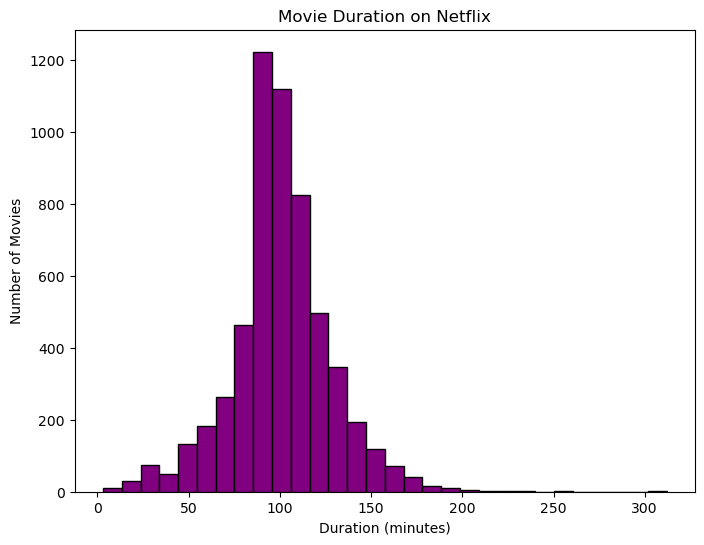

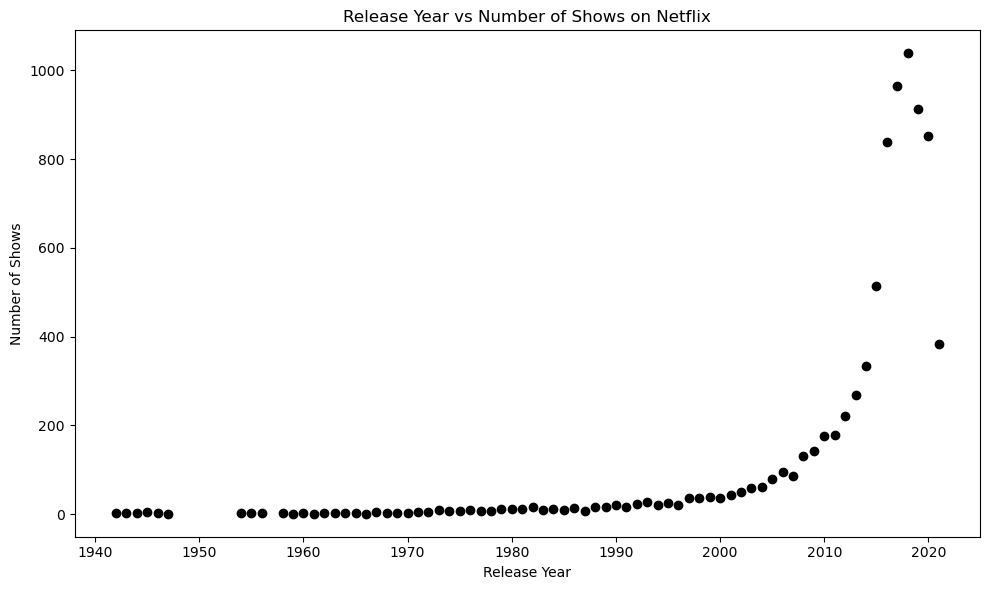

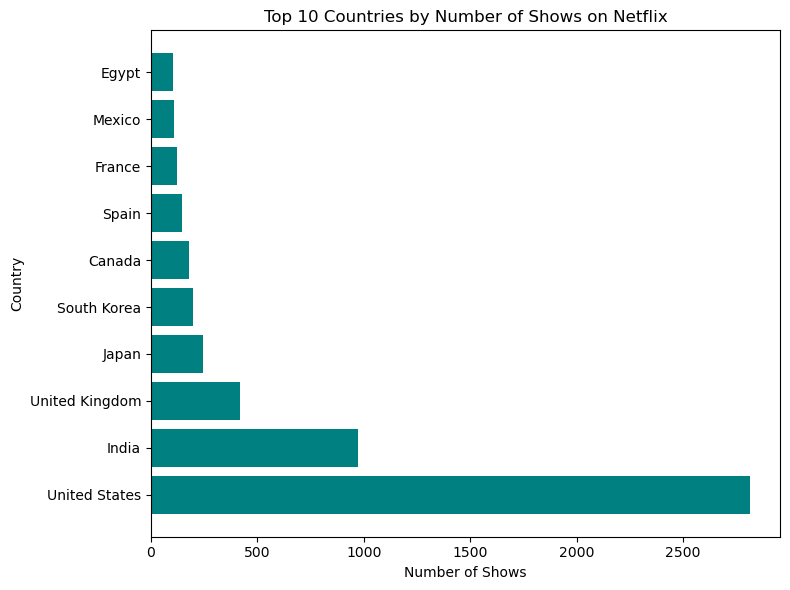

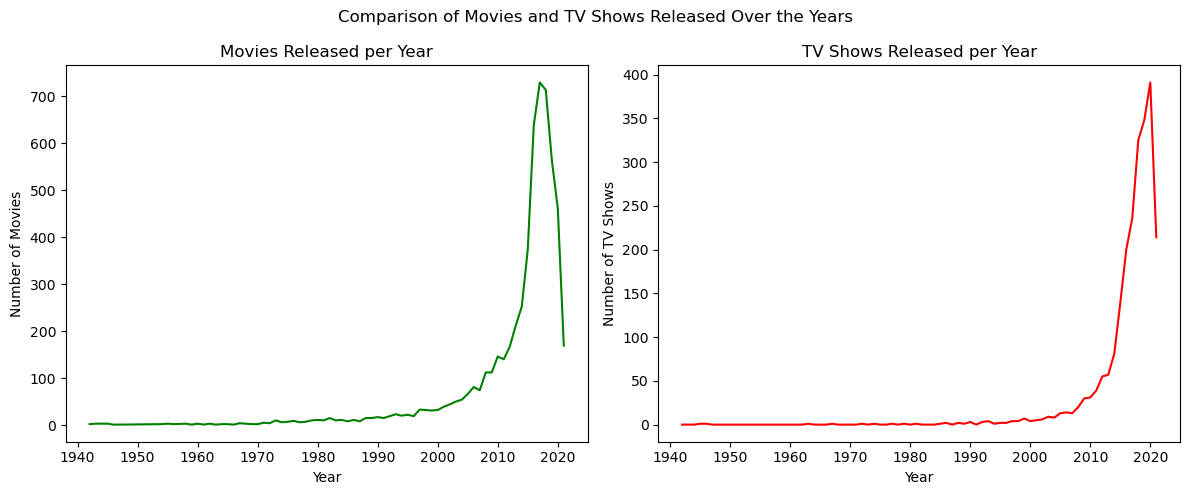

✅ All visualizations and summaries saved successfully.


In [30]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv(r"D:\Data Science\dataNetflix\netflix_titles.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Drop rows with missing key information
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

# --------- Visualization 1: Movies vs TV Shows ----------
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('movies_vs_tvshows.png')
plt.show()

# --------- Visualization 2: Content Rating Pie Chart ----------
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.savefig('content_rating.png')
plt.show()

# --------- Visualization 3: Movie Duration Histogram ----------
movie_df = df[df['type'] == "Movie"].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '', regex=False).astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Movie Duration on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.savefig('movies_duration_histogram.png')
plt.show()

# --------- Visualization 4: Release Year Scatter Plot ----------
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color="black")
plt.title('Release Year vs Number of Shows on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

# --------- Visualization 5: Top 10 Countries ----------
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

# --------- Visualization 6: Movies vs TV Shows Released Over Time ----------
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot - Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='green')
ax[0].set_title('Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot - TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='red')
ax[1].set_title('TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over the Years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()

# --------- (Optional) Export summary tables ----------
# Save top 10 countries and type counts to CSV
type_counts.to_csv('type_counts_summary.csv')
country_counts.to_csv('top_10_countries_summary.csv')

print("✅ All visualizations and summaries saved successfully.")
